This file contains code for creating a visibility chart for multiple targets.

This version was created for the NEON 2025 Observing School (CAHA, Spain).

* License:
SPDX-License-Identifier: GPL-3.0+

* Created by:
C. Cabello (UCM; Spain), 
L. Costantin (CAB; Spain)

In [4]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from astropy.time import Time
from astroplan import Observer
from astroplan import FixedTarget
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation

from astroplan.plots import plot_altitude
from matplotlib.backends.backend_pdf import PdfPages

import warnings
warnings.filterwarnings("ignore")

In [5]:
EarthLocation.get_site_names()

['ALMA',
 'AO',
 'ARCA',
 'ASKAP',
 'ATA',
 'ATST',
 'Allen Telescope Array',
 'Anderson Mesa',
 'Anglo-Australian Observatory',
 'Apache Point',
 'Apache Point Observatory',
 'Arecibo',
 'Arecibo Observatory',
 'Astroparticle Research with Cosmics in the Abyss',
 'Atacama Large Millimeter Array',
 'Australian Square Kilometre Array Pathfinder',
 'BAO',
 'BBSO',
 'Beijing XingLong Observatory',
 'Big Bear Solar Observatory',
 'Black Moshannon Observatory',
 'CAHA',
 'CAHA',
 'CHARA',
 'CHIME',
 'Canada-France-Hawaii Telescope',
 'Canadian Hydrogen Intensity Mapping Experiment',
 'Catalina Observatory',
 'Catalina Observatory: 61 inch telescope',
 'Centro Astronomico Hispano-Aleman, Almeria',
 'Cerro Armazones Observatory',
 'Cerro Pachon',
 'Cerro Paranal',
 'Cerro Tololo',
 'Cerro Tololo Interamerican Observatory',
 'Cima Ekar 182 cm Telescope',
 'Cima Ekar Observing Station',
 'Ckoirama',
 'Ckoirama Observatory',
 'DCT',
 'DKIST',
 'DRAO',
 'DRAO 26m Telescope',
 'Daniel K. Inouye So

In [6]:
# list of targets

target = ('NGC1961',
          'NGC4138',
          'NGC2770')      

RA = ('05:42:04.633',
      '12:09:29.801',
      '09:09:33.622')  

DEC = ('+69:22:42.41',
       '+43:41:06.86',
       '+33:07:24.29')  

In [7]:
RA_list  = []
DEC_list = []

for i in range(len(RA)):
    RA_list.append(RA[i][0:2] + 'h' + RA[i][3:5] + 'm' + RA[i][6:11] + 's')
    DEC_list.append(DEC[i][0:3] + 'd' + DEC[i][4:6] + 'm' + DEC[i][7:11] + 's')

In [8]:
coordinates = []
targets_obj = []

for i in range(len(target)):

    coordinates.append(SkyCoord(RA_list[i], DEC_list[i], frame='icrs'))
    targets_obj.append(FixedTarget(name=target[i], coord=coordinates[i]))

observer = Observer.at_site('Centro Astronomico Hispano-Aleman, Almeria')


In [9]:
time = Time('2025-02-05 23:00:00')
observe_time = time + np.linspace(-7, 9, 55) * u.hour

with PdfPages('visibility_caha_sample.pdf') as pdf:
    for i in range(len(target)):
        fig, ax = plt.subplots()
        plot_altitude(targets_obj[i], observer, observe_time, 
                      brightness_shading=True, airmass_yaxis=True,
                      min_altitude=20)
        ax.axhline(40, color='black', linestyle='--', zorder=1)
        plt.title(targets_obj[i].name)
        pdf.savefig(bbox_inches='tight') 
        plt.close()

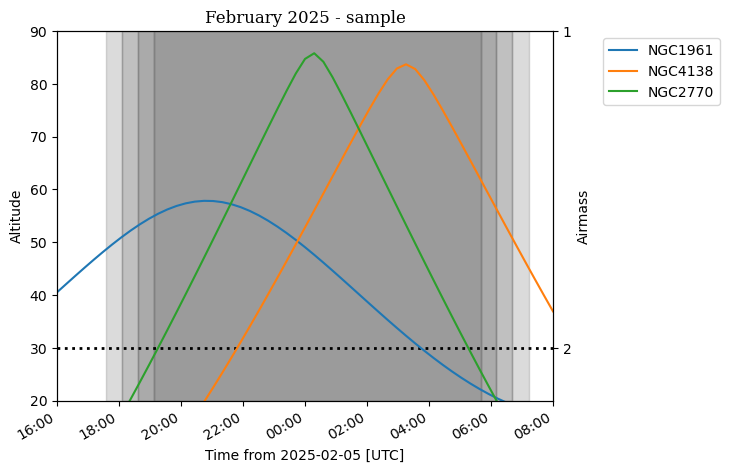

In [10]:

a_styles = ({'color': 'C0', 'ms': '0'},
            {'color': 'C1', 'ms': '0'},
            {'color': 'C2', 'ms': '0'},)

fig, ax = plt.subplots()

for i in range(len(coordinates)):
    plot_altitude(targets_obj[i], observer, observe_time, 
                  brightness_shading=True, airmass_yaxis=True,
                  min_altitude=20, style_kwargs=a_styles[i], ax=ax)

ax.legend(bbox_to_anchor=(1.35, 1.0))
ax.axhline(30, color='black', linestyle='dotted', linewidth=2, zorder=1)
plt.title('February 2025 - sample', family='serif')
plt.savefig('visibility_caha_all.pdf',bbox_inches='tight')

plt.show()